<a href="https://colab.research.google.com/github/zexross/club-assignments/blob/master/simple-linear-regression/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Initialize the parameters

def initialize_parameters(n_x):
    W = np.zeros((1,n_x))
    b = np.zeros((1,n_x))
    
    parameters = {"W": W,
                  "b": b}
        
    return parameters

In [ ]:
#Calculation of Z = W*A_previous + B

def linear_forward(A,W,b):
    Z=np.dot(W,A)+b
    linear_cache = (A,W,b)
    return Z,linear_cache

In [ ]:
#Compute Cost of the overall model.

def compute_cost(H,Y):
    data_length = len(Y)
    cost =1/(2*data_length) * np.sum(np.multiply(H - Y, H - Y))
    cost = np.squeeze(cost)
    assert(cost.shape == ())  
    return cost

In [ ]:
# Linear_backward

def gradient_descent(H, Y, X):
    data_length = len(X)
    dW = (1/data_length)*np.sum(np.dot(H - Y,X.T))
    db = (1/data_length)*np.sum(H - Y)
    return dW,db

In [ ]:
# Updates the parameters according to the obtained gradient values

def update_parameters(parameters, grads, learning_rate):
    parameters["W"] = parameters["W"] - learning_rate * grads["dW"]
    parameters["b"] = parameters["b"] - learning_rate * grads["db"]    
    return parameters

In [ ]:
# Main body of the Simple Regression Model which contains the procedural instructions to the execution of model

def linear_regression(X,Y,learningrate,n_x,num_iterations,print_cost):
    costs=[]
    
    #Initailise and fetch the weights through dictionary
    parameters = initialize_parameters(n_x)
    W = parameters["W"]
    b = parameters["b"]
    
    for i in range(0, num_iterations):
    
        # Forward propagation
        Z,linear_cache1 = linear_forward(X, W, b)   #Calculation of prediction or output value
    
        # Compute cost
        cost = compute_cost(Z, Y)
        costs.append(cost)       
    
        # Gradient Descent
        dW, db = gradient_descent(Z, Y, X)
    
        # Stores the gradient values in the dictionary grads
        grads = { "dW" : dW,
                  "db" : db}
        
        # Update the parameters
        parameters =  update_parameters(parameters, grads, learningrate)
    
        # Retrieve W, b from the dictionary parameters
        W = parameters["W"]
        b = parameters["b"]
        
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    
    #Plot the cost funtion curve
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iterations")
    plt.show()
    return parameters

In [ ]:
# Input Data

X = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
Y = np.array([6, 10, 18, 26, 28, 37, 41, 50, 53, 62, 66, 70, 80, 82, 88])

Cost after iteration 0: 1474.9
Cost after iteration 10: 422.41826122775757
Cost after iteration 20: 428.98182276962007
Cost after iteration 30: 429.03428914280175
Cost after iteration 40: 429.0347012807056
Cost after iteration 50: 429.0347045177231
Cost after iteration 60: 429.0347045431472
Cost after iteration 70: 429.0347045433472
Cost after iteration 80: 429.0347045433489
Cost after iteration 90: 429.03470454334865


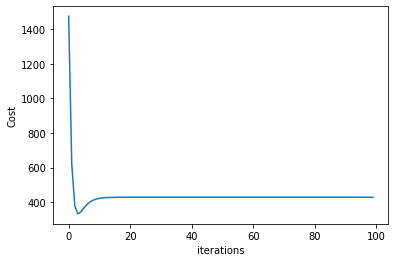

In [ ]:
n_x= len(X)
learningrate = 0.0001
print_cost=True

parameters = linear_regression(X.T, Y.T, learningrate, n_x, 100, print_cost)

## End Note
---
Go ahead change the hyperparameters to improve the perfomance. Optionally, look for better architectures